This script plots the domain of the Desert Southwest and the domain of the Colorado Plateau.

FIGURE VERSION

In [1]:
# import functions
# OS interaction and time
import os
import sys
import cftime
import datetime
import time
import glob
import dask
import dask.bag as db
import calendar

# math and data
import numpy as np
import netCDF4 as nc
import xarray as xr
import scipy as sp
import pandas as pd
import pickle as pickle
from sklearn import linear_model
import matplotlib.patches as mpatches
from shapely.geometry.polygon import LinearRing
import statsmodels.stats.multitest as multitest

# plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import ticker
import matplotlib.colors as mcolors
from matplotlib.gridspec import GridSpec

from matplotlib.ticker import FormatStrFormatter
from mpl_toolkits.axes_grid1.axes_divider import HBoxDivider
import mpl_toolkits.axes_grid1.axes_size as Size
from mpl_toolkits.axes_grid1 import make_axes_locatable

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point

# random
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

In [2]:
fig_out_path = '/glade/u/home/zcleveland/NAM_soil-moisture/ERA5_analysis/figures/'  # path to generated figures

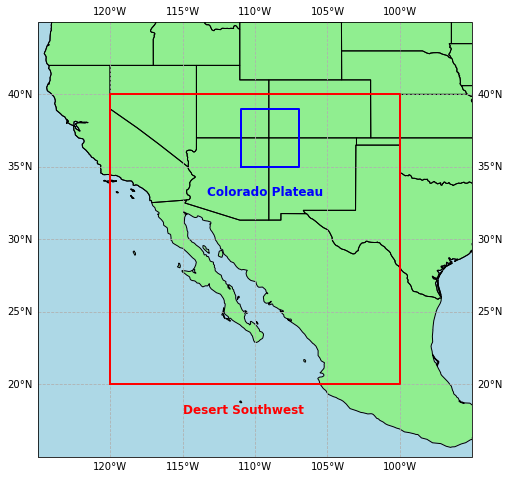

In [3]:
# Create a new figure with a Lambert Conformal projection
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-125, -95, 15, 45], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.COASTLINE, edgecolor='black')
ax.add_feature(cfeature.STATES, edgecolor='black')
ax.add_feature(cfeature.BORDERS, edgecolor='black')

# Draw the red box for "Desert Southwest"
desert_sw_box = {
    'lon': [-120, -100, -100, -120, -120],
    'lat': [20, 20, 40, 40, 20]
}
ax.plot(desert_sw_box['lon'], desert_sw_box['lat'], color='red', linewidth=2, transform=ccrs.PlateCarree())
ax.text(-115, 18, 'Desert Southwest', color='red', fontsize=12, weight='bold', transform=ccrs.PlateCarree())

# Draw the blue box for "Colorado Plateau"
colorado_plateau_box = {
    'lon': [-111, -107, -107, -111, -111],
    'lat': [35, 35, 39, 39, 35]
}
ax.plot(colorado_plateau_box['lon'], colorado_plateau_box['lat'], color='blue', linewidth=2, transform=ccrs.PlateCarree())
ax.text(-113.3, 33, 'Colorado Plateau', color='blue', fontsize=12, weight='bold', transform=ccrs.PlateCarree())

# Set background colors
ax.set_facecolor('lightgreen')  # Set land background to light green
# ax.set_edgecolor('None')        # Set edge color to none for a cleaner look

ax.add_feature(cfeature.OCEAN, color='lightblue')  # Set ocean color to light blue

# Add gridlines with labels every 5 degrees
gl = ax.gridlines(draw_labels=True, linestyle='--')
gl.top_labels = True
gl.right_labels = True
gl.xlines = True
gl.ylines = True
gl.xlocator = plt.FixedLocator(range(-130, -89, 5))
gl.ylocator = plt.FixedLocator(range(10, 51, 5))

# # Adjust spacing to prevent title and top labels from overlapping
# fig.subplots_adjust(top=0.9)

# fig.suptitle('Study Domain', fontsize=18)

plt.savefig(f'{fig_out_path}low-res/study_domain.png', dpi=300, bbox_inches='tight')
plt.savefig(f'{fig_out_path}high-res/study_domain.png', dpi=1000, bbox_inches='tight')
plt.show()